## Business Problem

Dataco is an Ecommerce platform selling goods and accessories across the world. E-commerce goods Late delivery risk identification by predicting fastest and normal Shipping Durations. The machine learning models built by us, will enable E-commerce and Goods/products delivery industries to identify the 'risk of late delivery' and predict the fastest and normal duration of goods shipment for their Inland and foreign clients/ customers/buyers.

This is the dataset of Supply Chains used by the company DataaCo Global which includes a collection of their products sold, finacial details(profit, loss, total sales etc.), Shipping details, and customer details such as sales, demographics, and transaction details. The data spans to 91 MB engulfing details of 180,520 customers spanning to 53 columns related to Clothing , Sports,and Electronic Supplies.

It represents the sale of sporting goods across the world in different regions such as Africa, Europe, LATAM, US and Asia. The data represents the time period for 4years ie, 2015 to 2018.

## Business Objective :


Building a regression model to predict Sales;

Building a Binary Classification model to classify orders with high probabilty of late delivery (Late Delivery Risk analyser).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from warnings import filterwarnings
filterwarnings(action='ignore')
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import *

In [6]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin')

In [7]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [8]:
df.shape

(180519, 53)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### Checking for Duplicates

In [10]:
df.duplicated().sum()

0

### Checking for Missing Values:

In [11]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [12]:
df_master = df.copy()

In [13]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping d

In [14]:
 df= df.drop(['Category Id', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password',
              'Department Id','Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id','Order Zipcode', 
              'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image'],axis = 1)

In [15]:
df.shape

(180519, 37)

### Data Summary Analysis

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933
Longitude,180519.0,-84.915675,21.433241,-158.025986,-98.446312,-76.847908,-66.370583,115.263077
Order Item Discount,180519.0,20.664741,21.800901,0.000000,5.400000,14.000000,29.990000,500.000000
Order Item Discount Rate,180519.0,0.101668,0.070415,0.000000,0.040000,0.100000,0.160000,0.250000


In [17]:
df.drop(['Order Item Total','Order Profit Per Order','Order Item Product Price','Product Status'], axis = 1, inplace= True)

In [18]:
df.shape

(180519, 33)

In [19]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Product Price', 'shipping date (DateOrders)', 'Shipping Mode'], dtype='object')

In [20]:
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping_date'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [21]:
df.drop(['order date (DateOrders)','shipping date (DateOrders)'],axis = 1 , inplace = True)

In [22]:
df_cat = df.select_dtypes(include= 'object')

In [23]:
df_cat.columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Shipping Mode'], dtype='object')

In [272]:
for i in df_cat.columns:
    print(df[i].value_counts())

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts   

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64


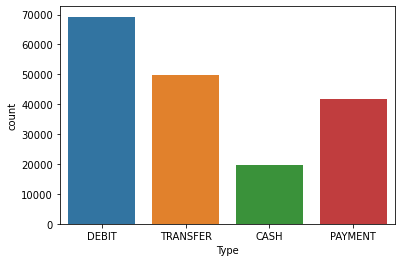

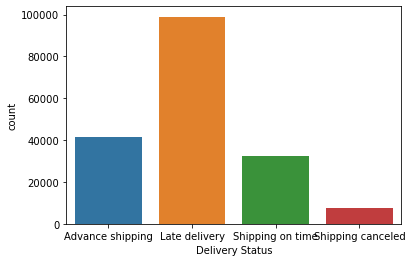

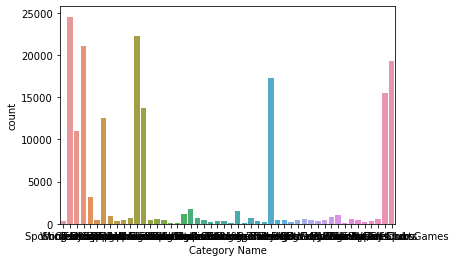

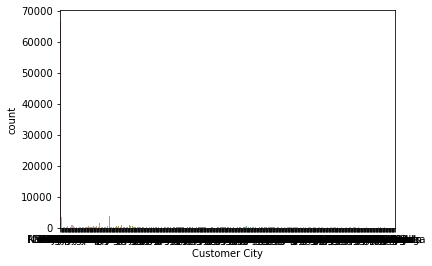

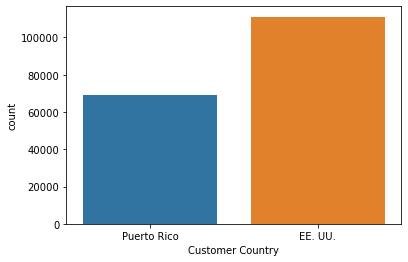

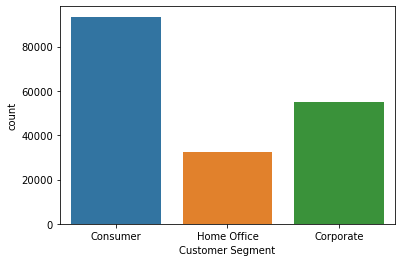

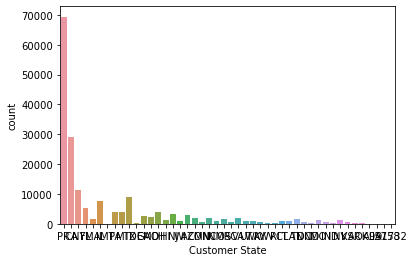

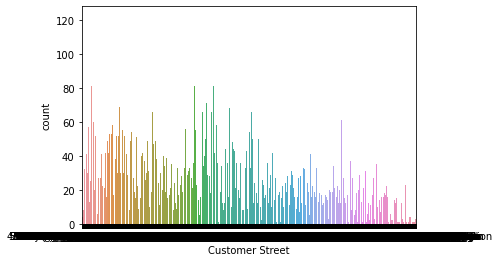

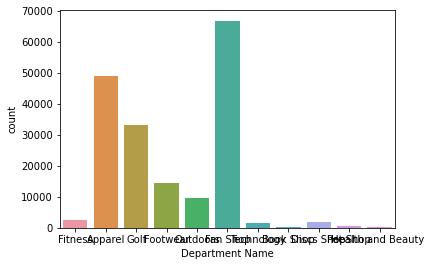

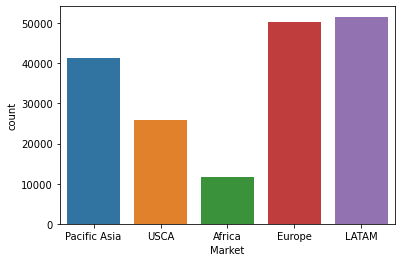

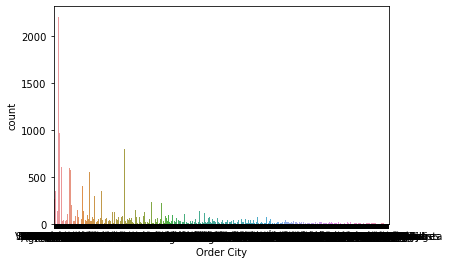

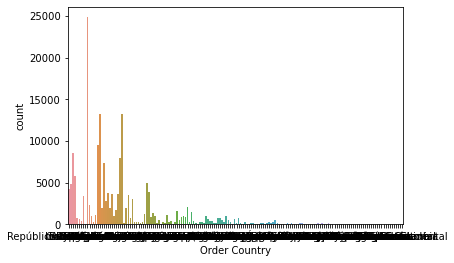

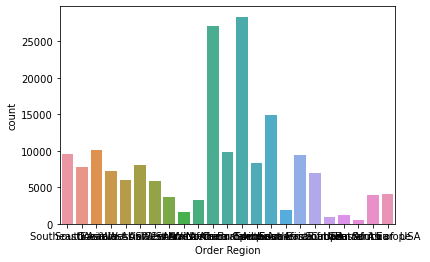

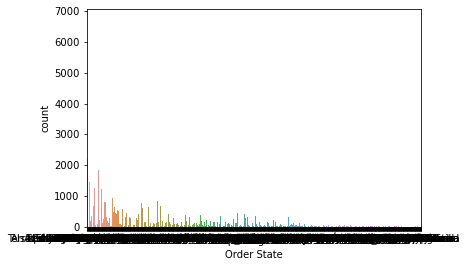

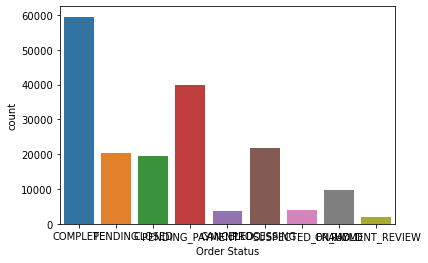

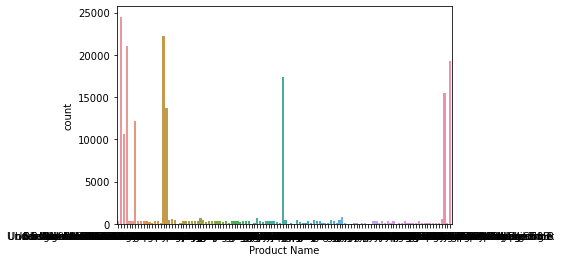

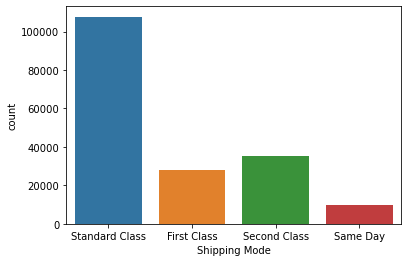

In [273]:
for i in df_cat.columns:
    sns.countplot(df_cat[i])
    plt.show()

In [274]:
df_cat.describe().T

,count,unique,top,freq
Type,180519,4,DEBIT,69295
Delivery Status,180519,4,Late delivery,98977
Category Name,180519,50,Cleats,24551
Customer City,180519,563,Caguas,66770
Customer Country,180519,2,EE. UU.,111146
Customer Segment,180519,3,Consumer,93504
Customer State,180519,46,PR,69373
Customer Street,180519,7458,9126 Wishing Expressway,122
Department Name,180519,11,Fan Shop,66861
Market,180519,5,LATAM,51594


In [24]:
df.drop(['Customer Street','Order City','Order State'], axis = 1, inplace = True)

In [25]:
 df.shape

(180519, 30)

### Univariate Analysis

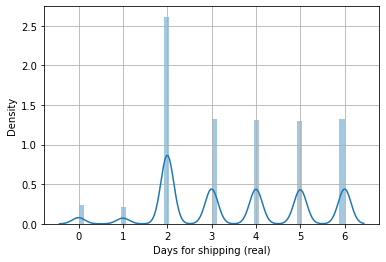

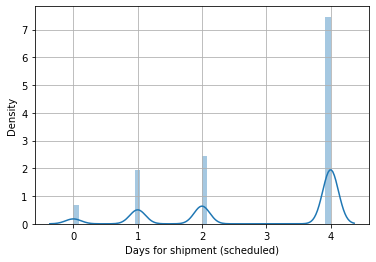

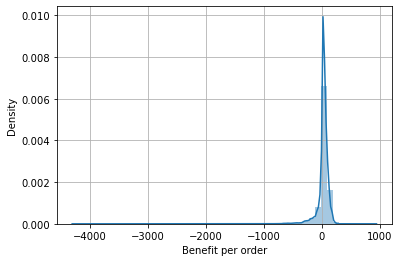

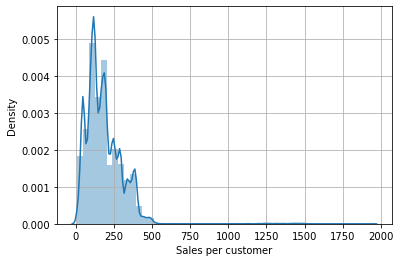

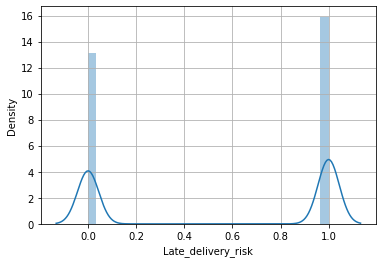

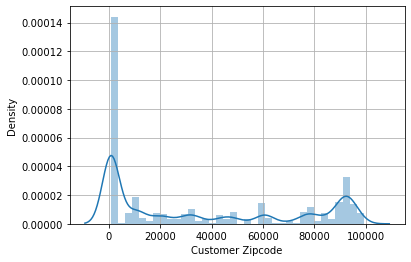

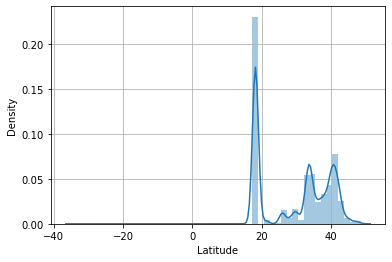

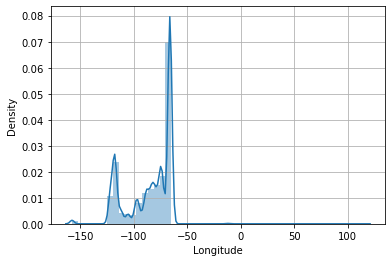

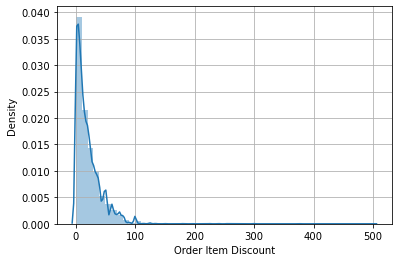

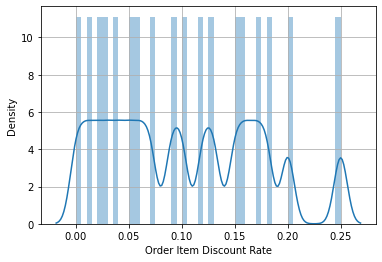

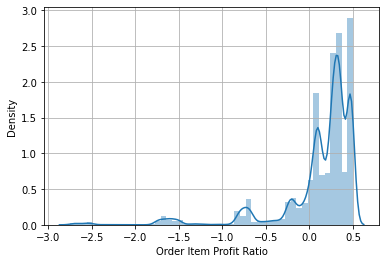

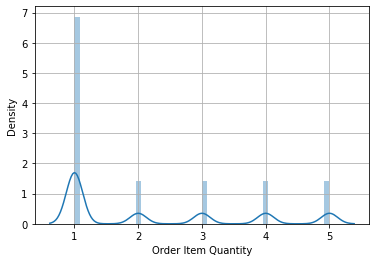

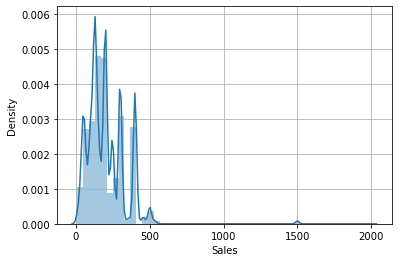

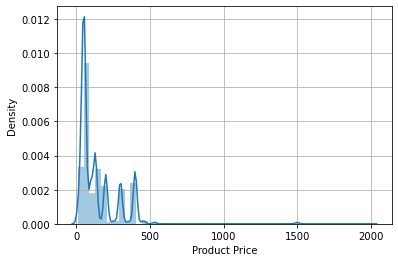

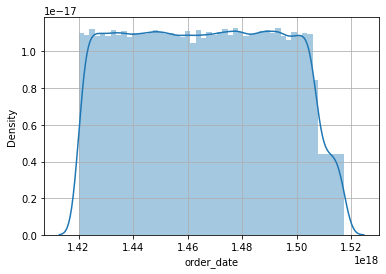

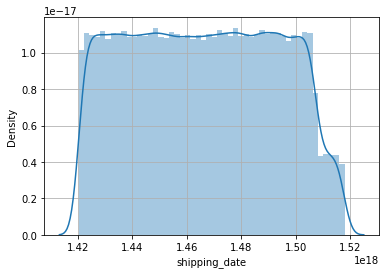

In [98]:
for i in df.select_dtypes(exclude='object'):
    sns.distplot(df[i])
    plt.grid()
    plt.show()

In [277]:
df.dropna(inplace = True)

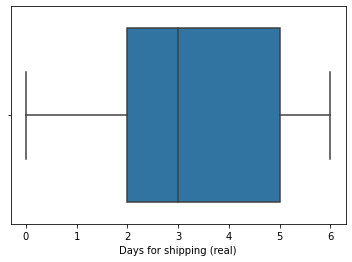

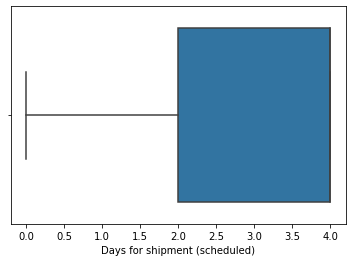

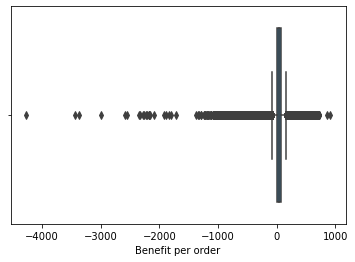

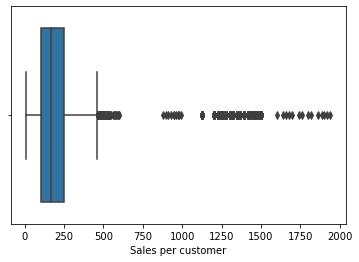

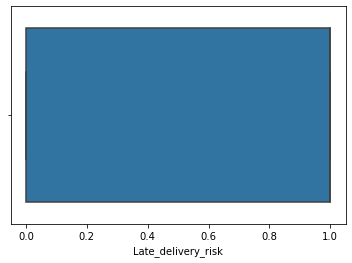

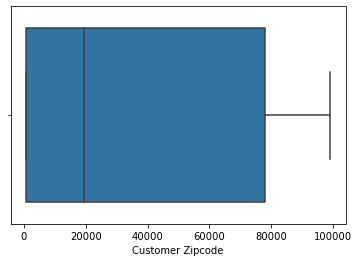

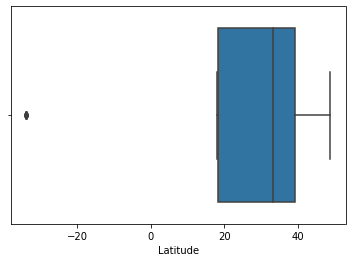

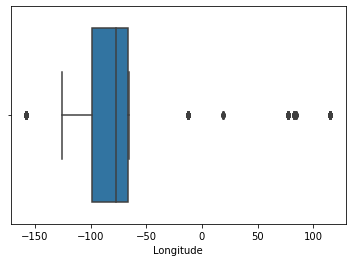

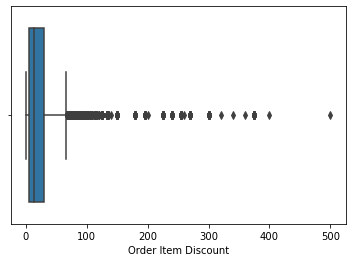

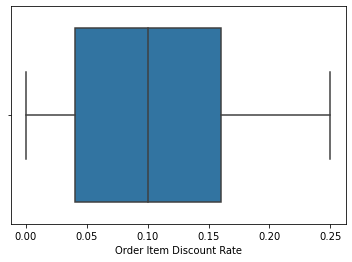

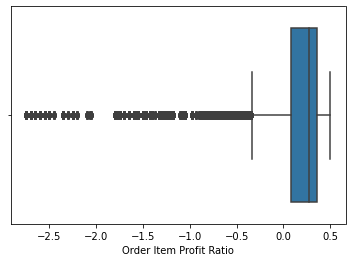

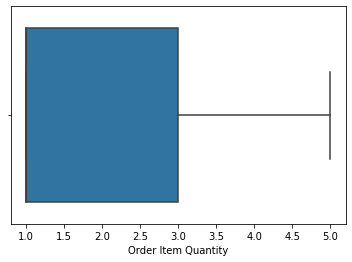

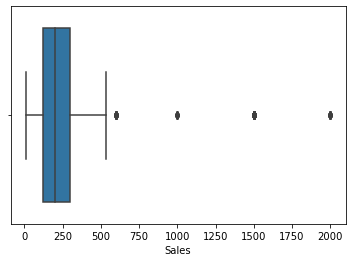

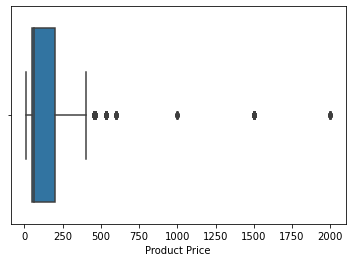

In [26]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

In [ ]:
var = round(df['Late_delivery_risk'].value_counts(normalize=True),2) * 100
var

### Bivariate Analysis

##### Numerical VS Numerical

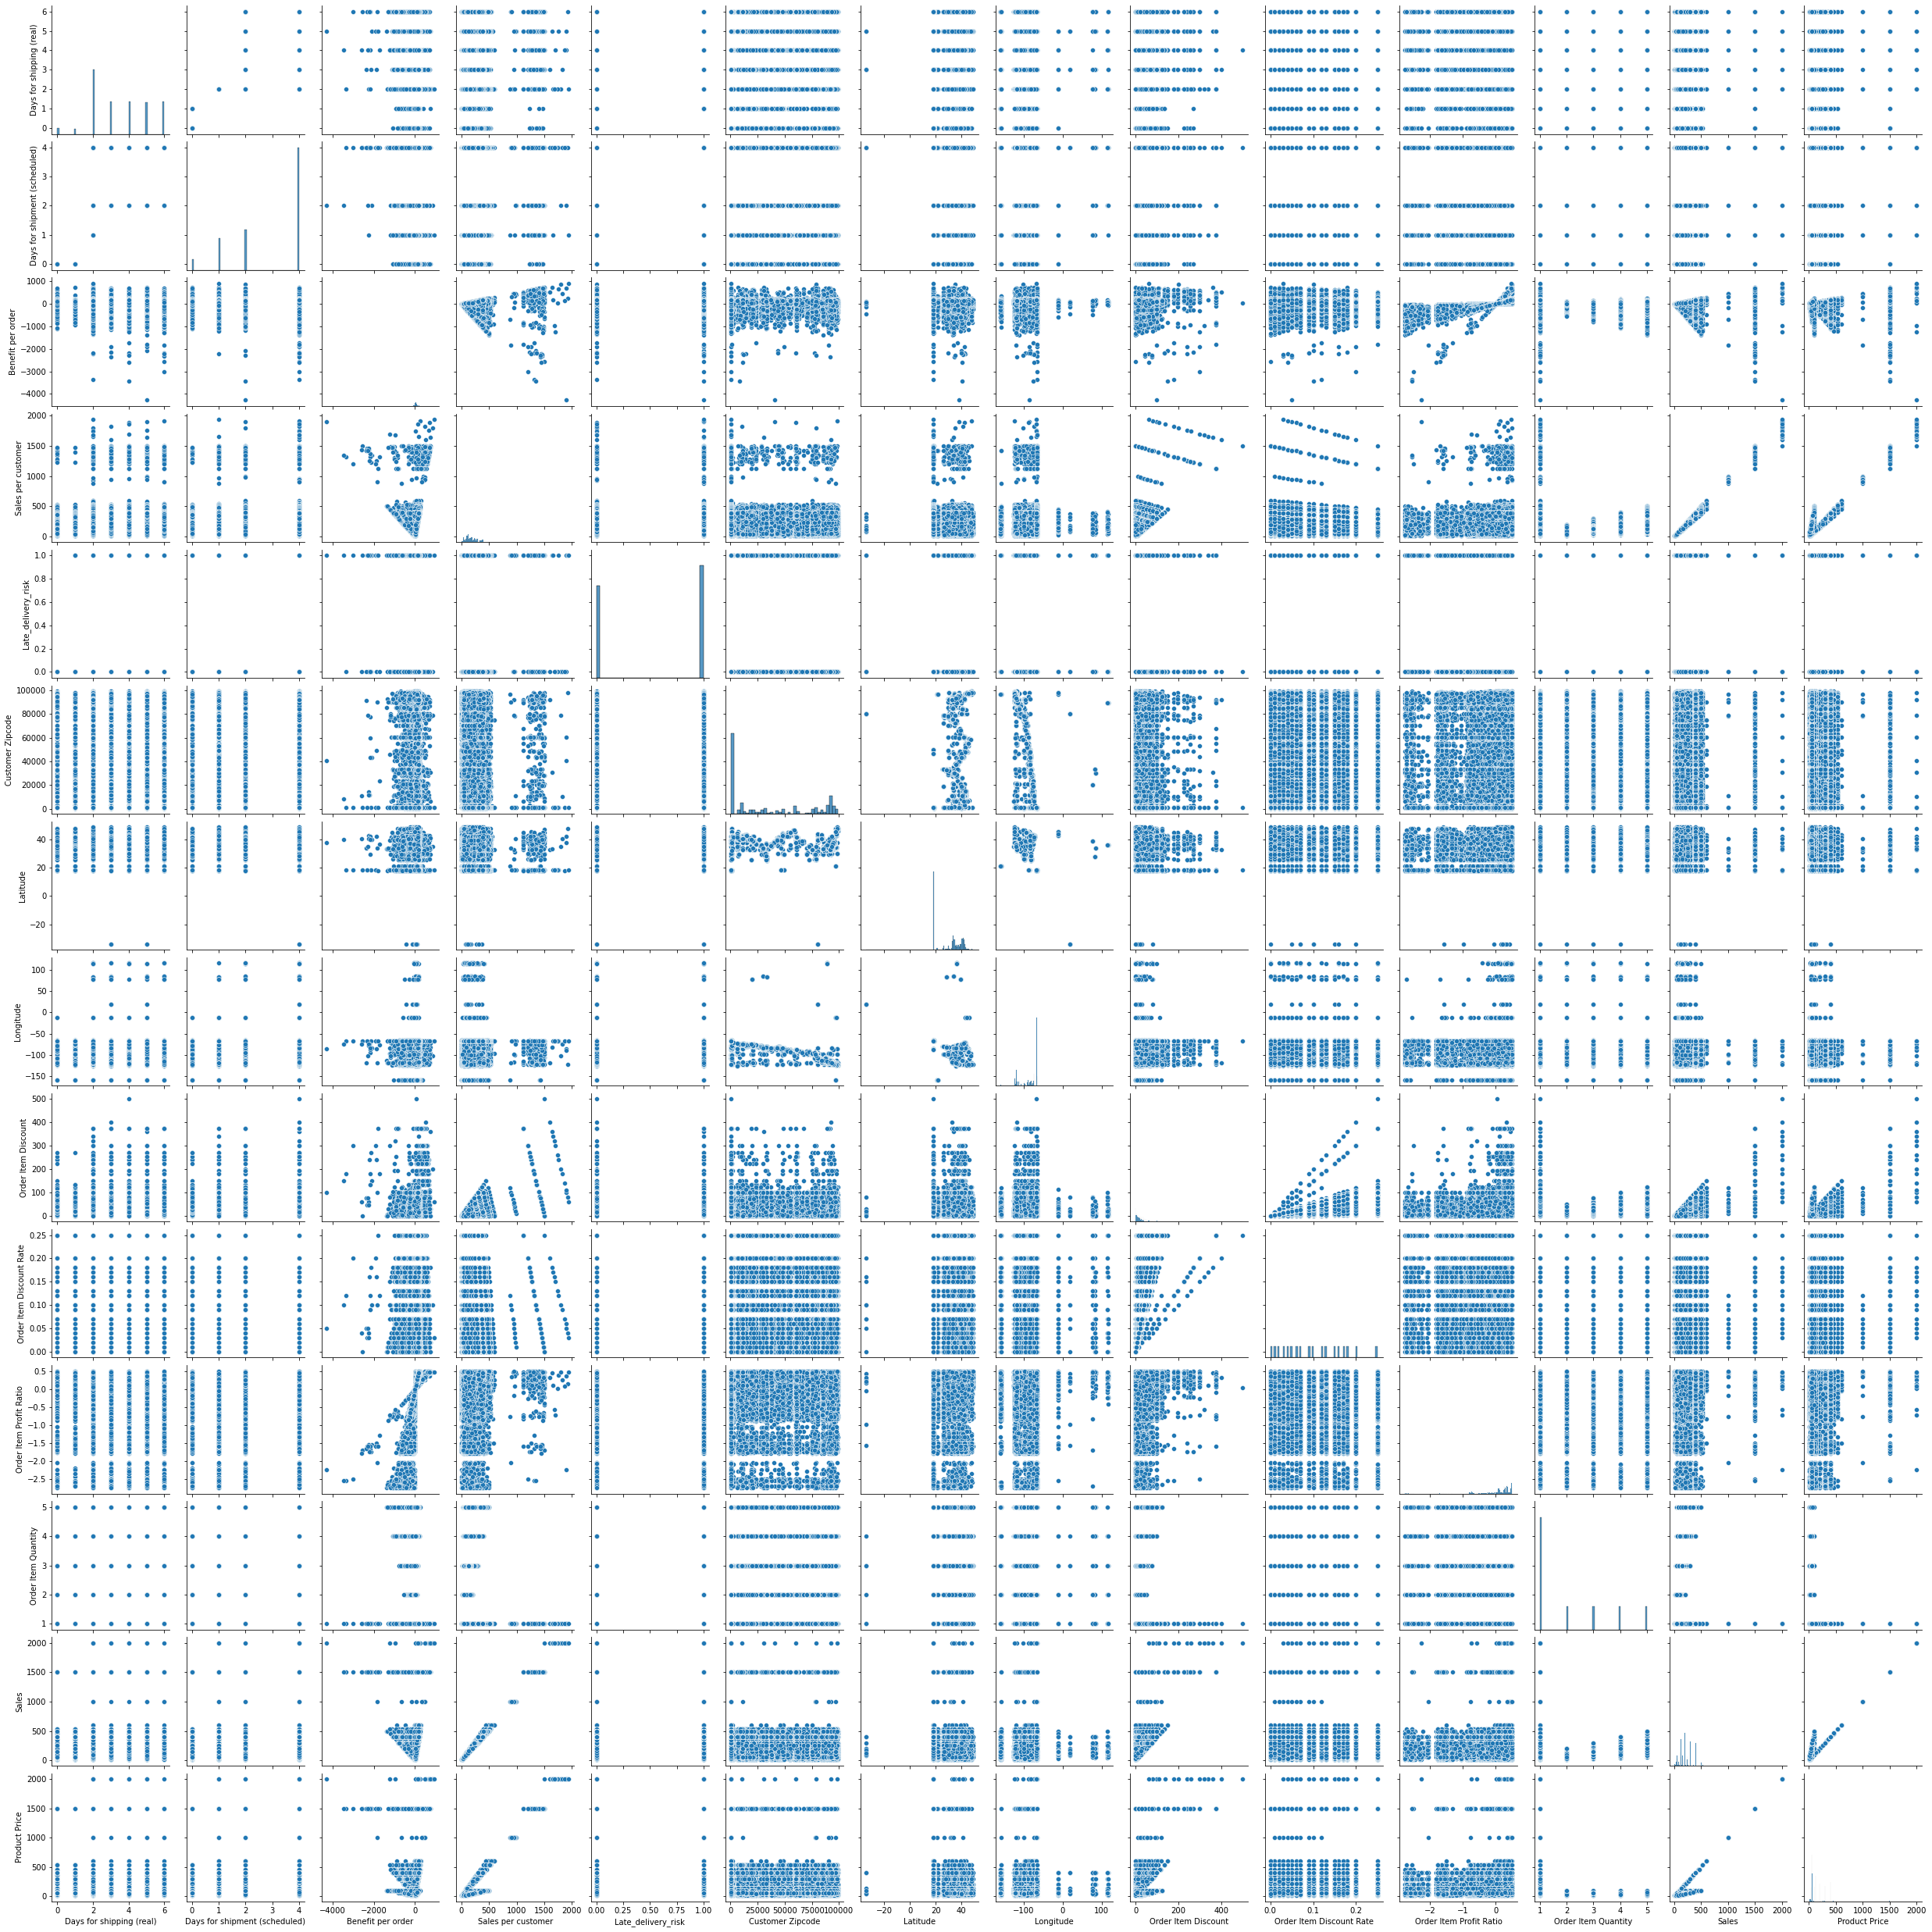

In [27]:
sns.pairplot(df.select_dtypes(include='number'))

 ##### Numerical VS Categorical

In [ ]:
df_cat = df.select_dtypes(include='object')

In [ ]:
df_cat.columns

In [ ]:
df.groupby('Customer Segment')['Sales'].describe()

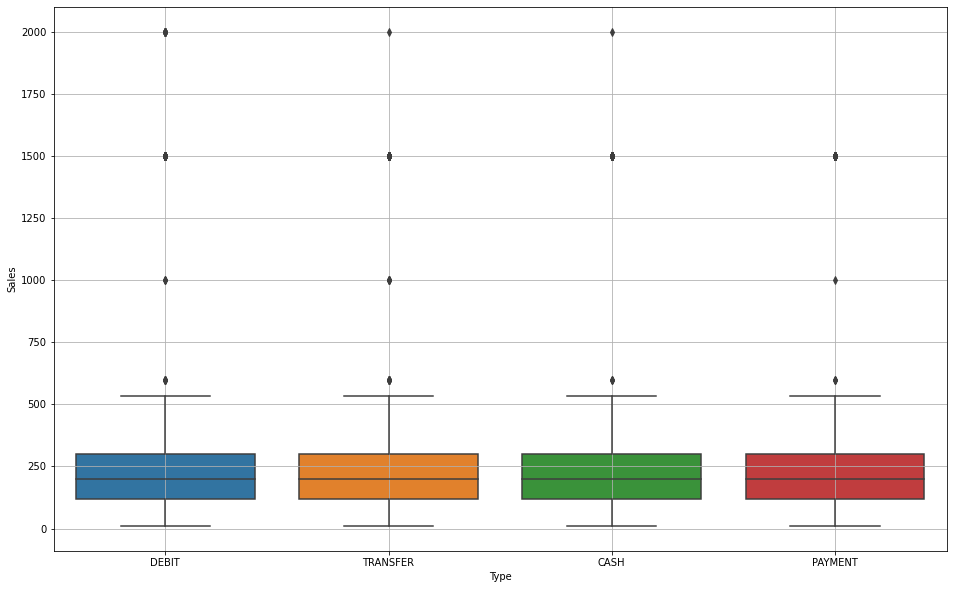

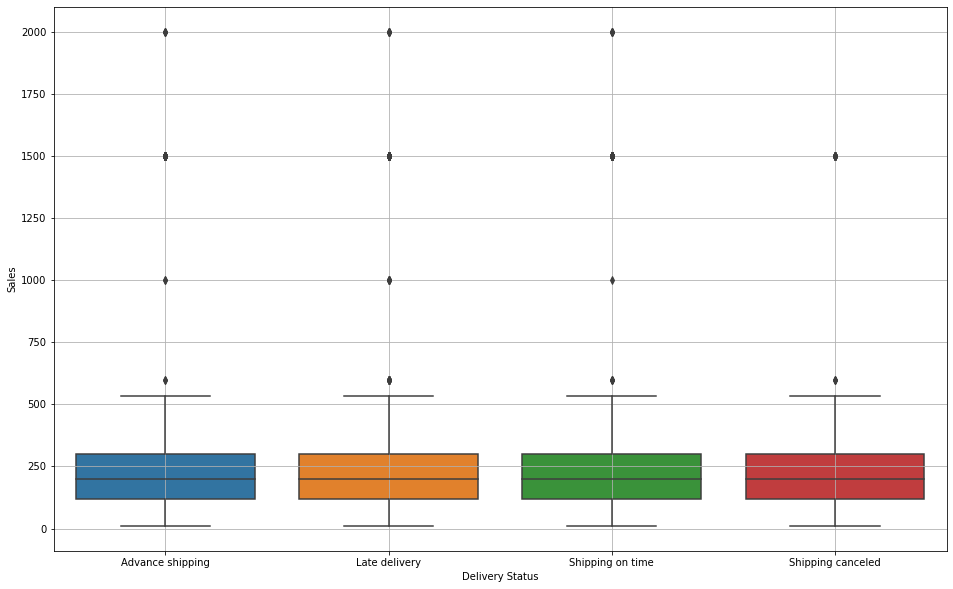

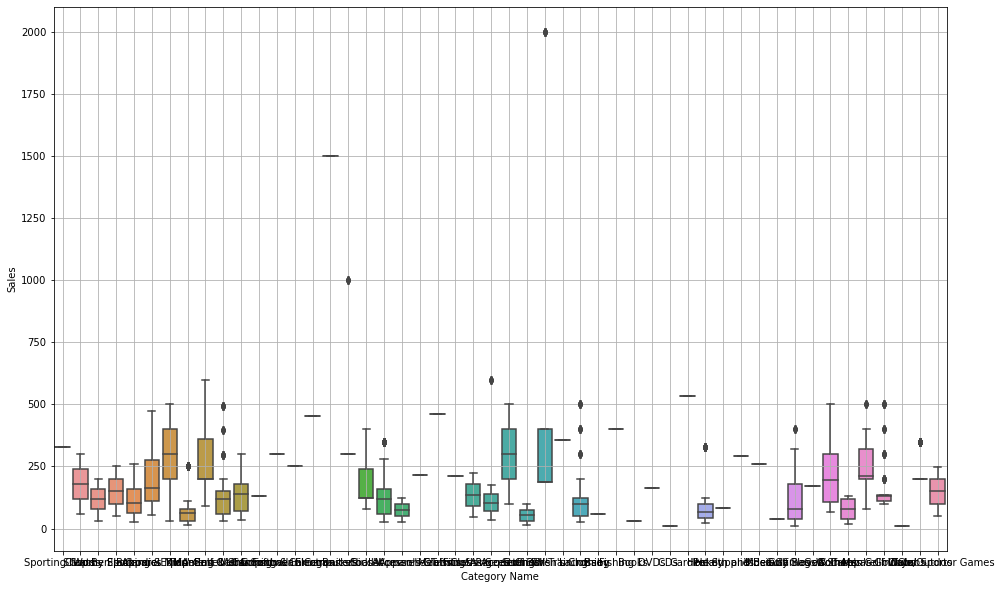

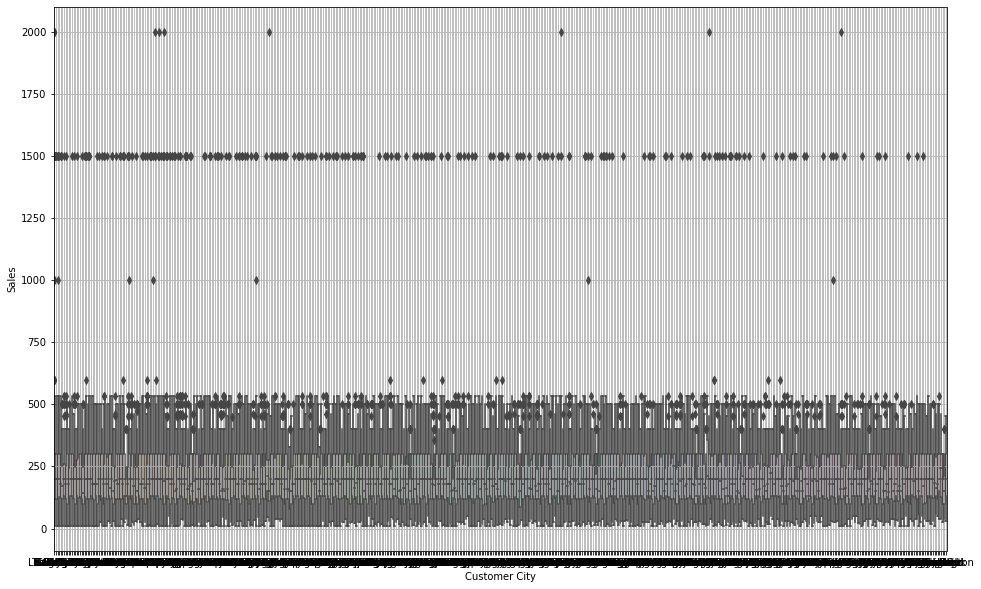

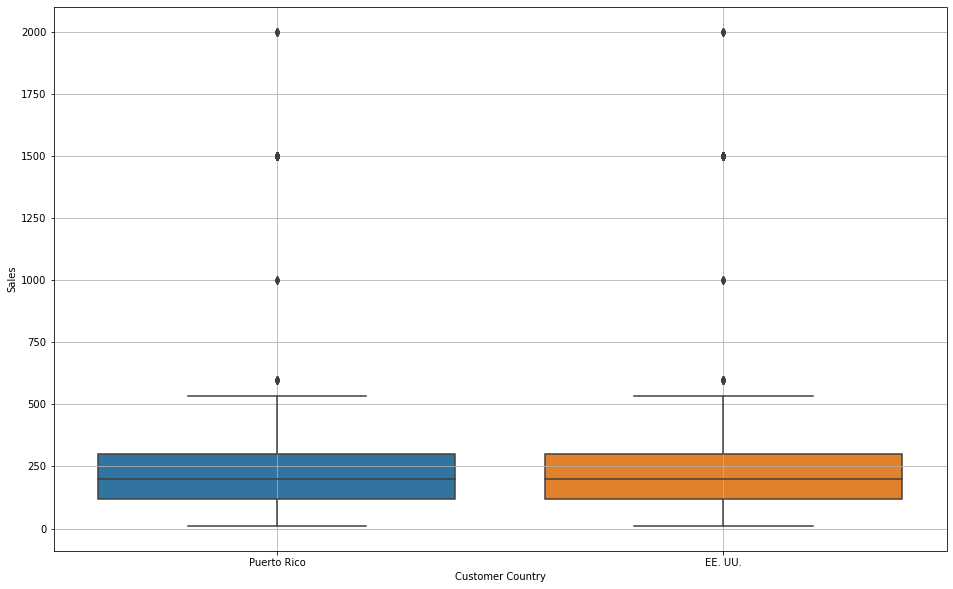

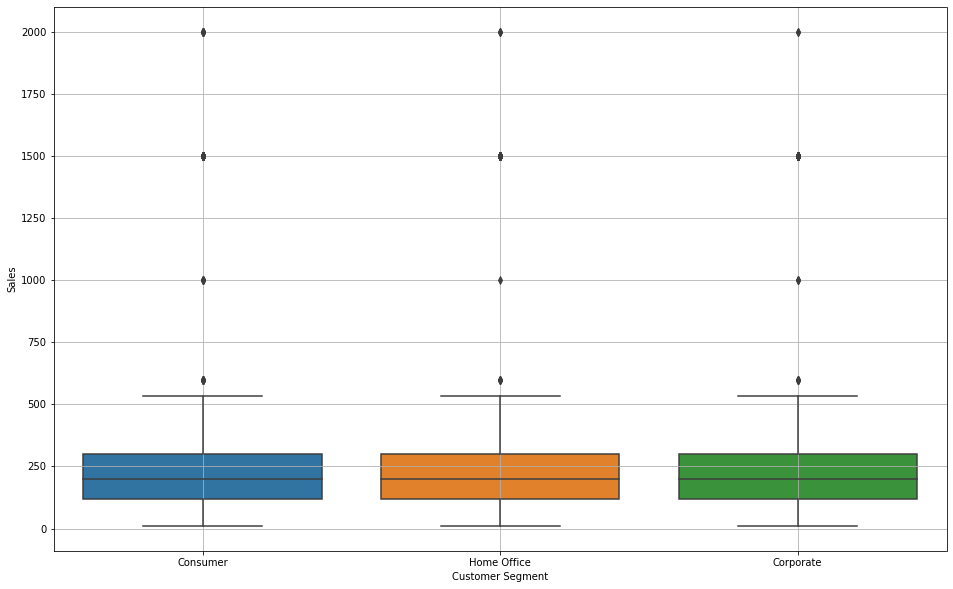

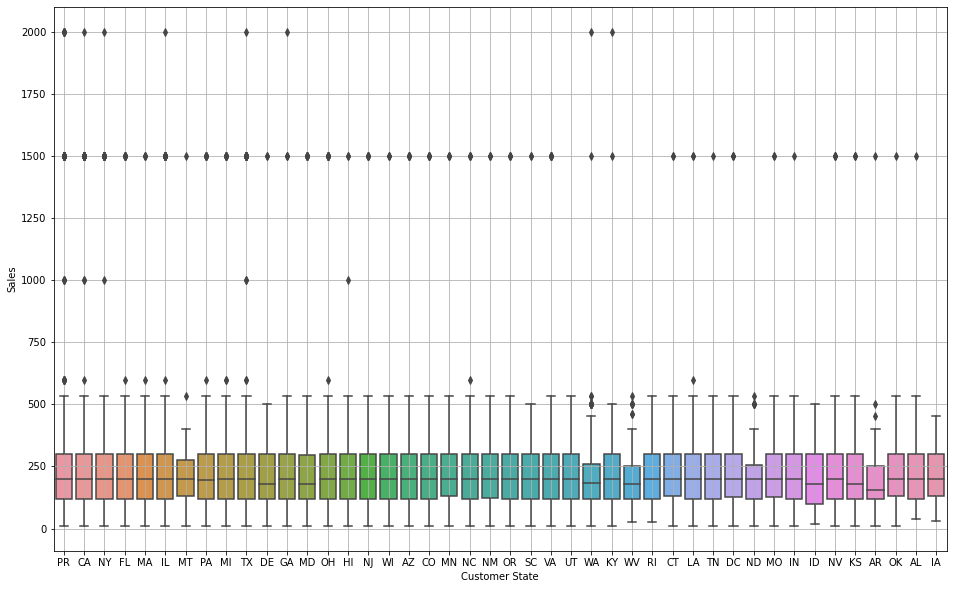

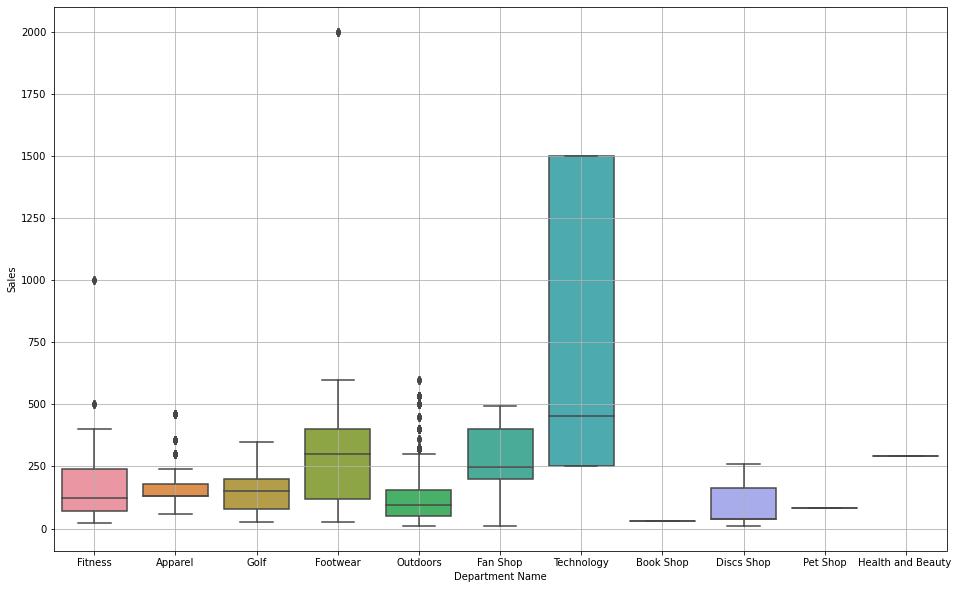

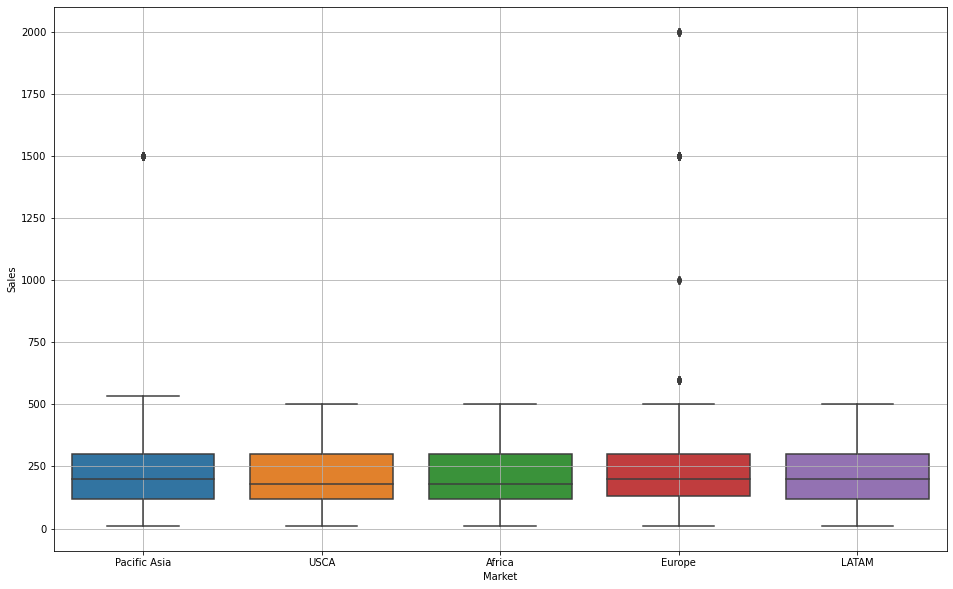

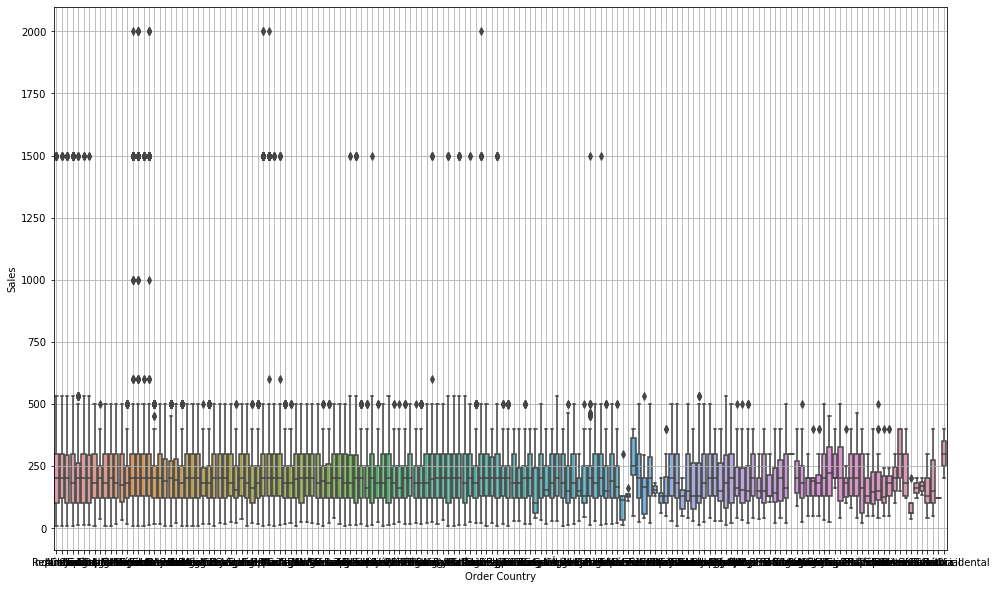

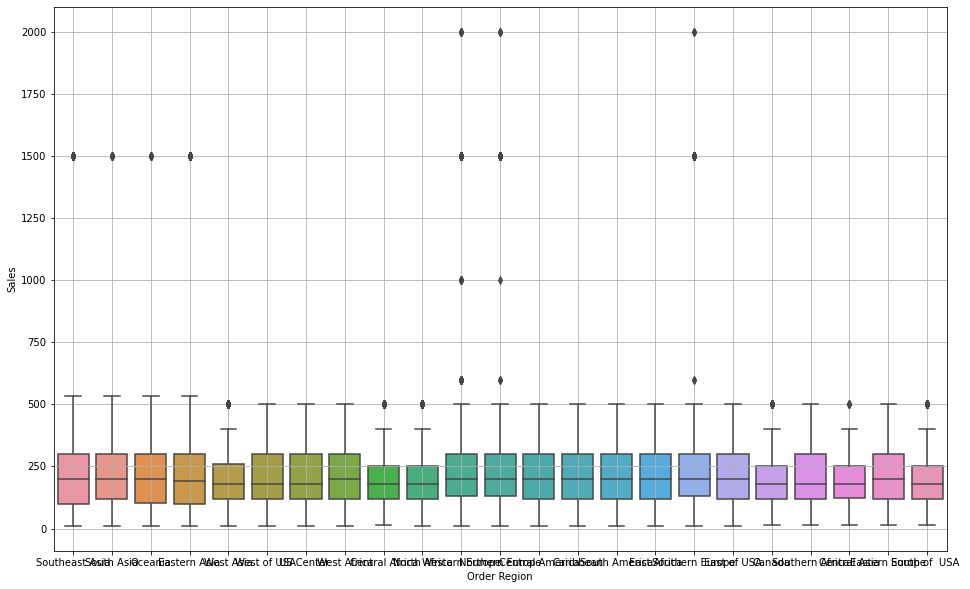

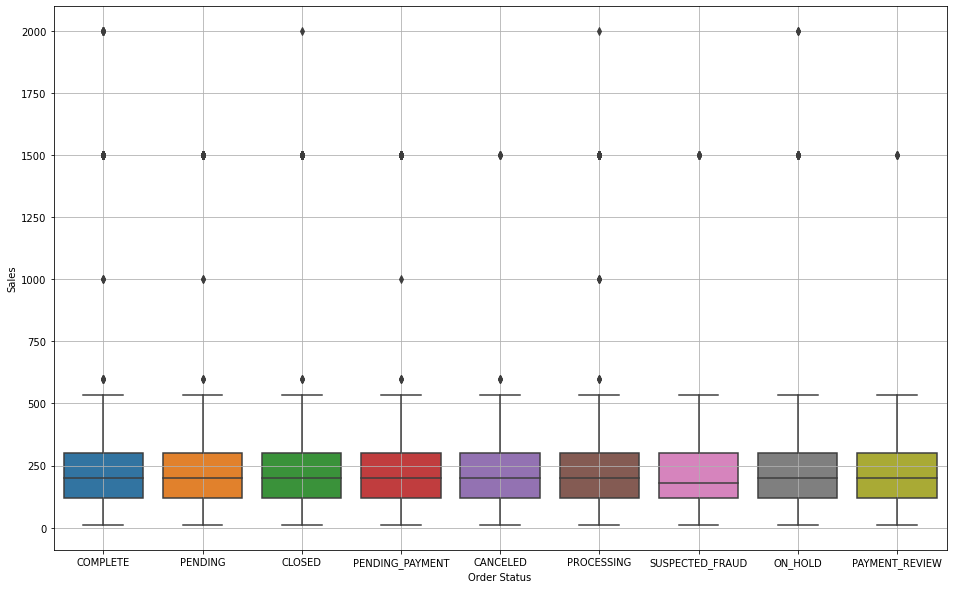

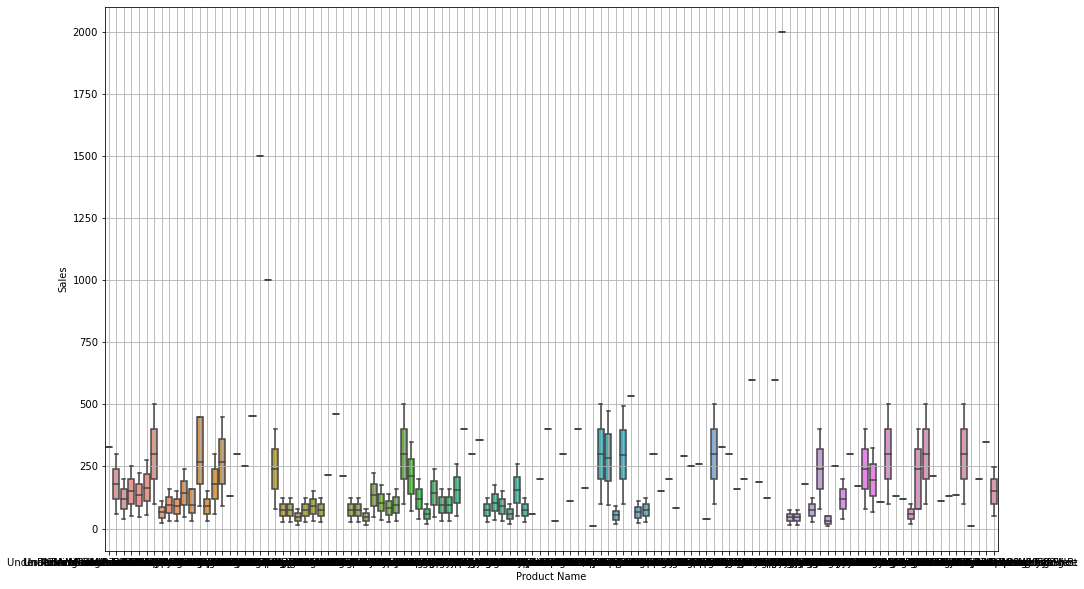

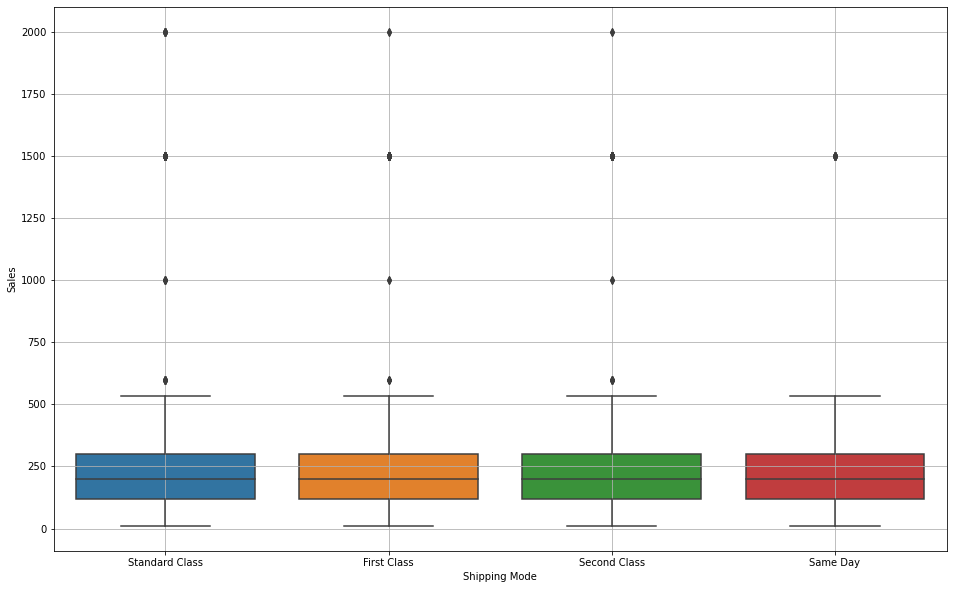

In [31]:
for i in df.select_dtypes(include = 'object'):
    plt.figure(figsize=(16,10))
    sns.boxplot(df[i], df['Sales'])
    plt.grid()
    plt.show()

In [104]:
df.groupby('Market')['Sales per customer'].sum()

Market
Africa          2.061679e+06
Europe          9.768709e+06
LATAM           9.235762e+06
Pacific Asia    7.434224e+06
USCA            4.553500e+06
Name: Sales per customer, dtype: float64

In [105]:
df.groupby('Shipping Mode')['Sales'].sum()

Shipping Mode
First Class       5.674117e+06
Same Day          1.942529e+06
Second Class      7.145445e+06
Standard Class    2.202200e+07
Name: Sales, dtype: float64

In [106]:
df.groupby('Type')['Sales'].sum()

Type
CASH        4.022624e+06
DEBIT       1.407625e+07
PAYMENT     8.490311e+06
TRANSFER    1.019490e+07
Name: Sales, dtype: float64

In [27]:
df_geo = df.groupby(['Order Country'])['Sales'].sum().reset_index(name ='Sales').sort_values(by='Sales', ascending = False)
fig = px.choropleth(df_geo, locationmode = 'country names', locations = 'Order Country', color = 'Sales',
                    hover_name = 'Order Country', color_continuous_scale = px.colors.sequential.Plasma)
fig.show()

##### Categorical VS Categorical

In [280]:
pd.crosstab(df['Late_delivery_risk'], df['Market'], normalize= True) * 100

Market,Africa,Europe,LATAM,Pacific Asia,USCA
Late_delivery_risk,,,,,
0,2.921625,12.468701,13.045935,10.274436,6.459815
1,3.512154,15.368167,15.535465,12.581710,7.831993


In [281]:
pd.crosstab(df['Late_delivery_risk'], df['Shipping Mode'], normalize= True) * 100

Shipping Mode,First Class,Same Day,Second Class,Standard Class
Late_delivery_risk,,,,
0,0.720712,2.926610,4.558599,36.964590
1,14.686787,2.467371,14.949921,22.725409


In [282]:
pd.crosstab(df['Late_delivery_risk'], df['Customer Segment'], normalize= True) * 100

Customer Segment,Consumer,Corporate,Home Office
Late_delivery_risk,,,
0,23.407897,13.741718,8.020896
1,28.389173,16.609054,9.831261


### Multivariate Analysis

In [283]:
plt.rcParams['figure.figsize'] = [15,10]

In [284]:
tab1 = pd.pivot_table(data = df, index = ['Type'], columns=['Market'], values=['Sales'], aggfunc=np.sum)
tab1

Sales                                                        
Market           Africa        Europe         LATAM  Pacific Asia          USCA
Type                                                                           
CASH      231618.894450  1.185257e+06  1.138094e+06  9.124428e+05  5.552109e+05
DEBIT     896743.877358  4.225215e+06  3.846951e+06  3.128247e+06  1.979092e+06
PAYMENT   529235.590476  2.502755e+06  2.359306e+06  1.968023e+06  1.130992e+06
TRANSFER  636854.562919  2.958560e+06  2.933262e+06  2.264991e+06  1.401235e+06

<AxesSubplot:xlabel='Type'>

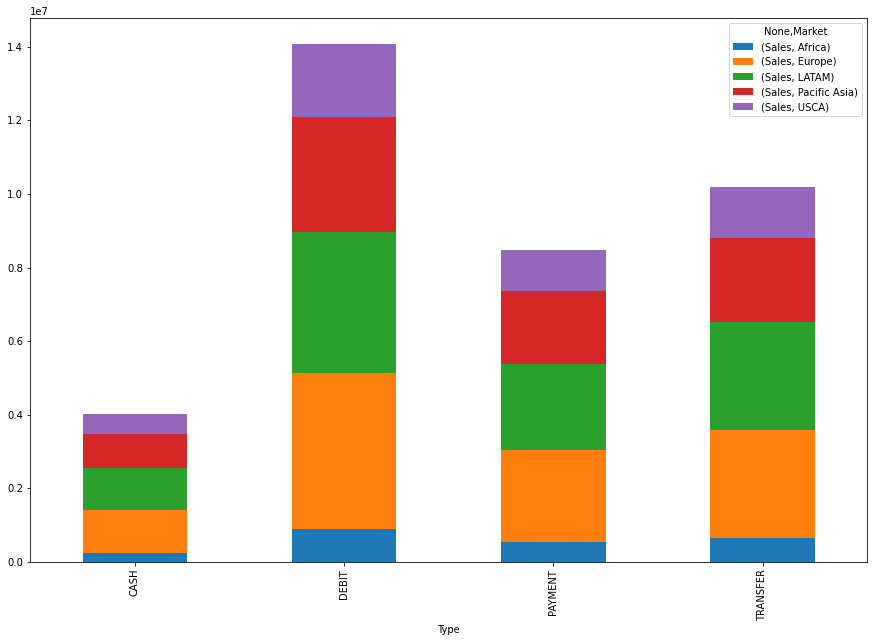

In [285]:
tab1.plot.bar(stacked= True)

In [286]:
df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day
df['order_weekday'] = pd.DatetimeIndex(df['order_date']).weekday

In [287]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order Status,Product Name,Product Price,Shipping Mode,order_date,shipping_date,order_year,order_month,order_day,order_weekday
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Indonesia,13.110000,0.04,0.29,1,327.75,Southeast Asia,COMPLETE,Smart watch,327.75,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,2018,1,31,2
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,India,16.389999,0.05,-0.80,1,327.75,South Asia,PENDING,Smart watch,327.75,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,2018,1,13,5
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,India,18.030001,0.06,-0.80,1,327.75,South Asia,CLOSED,Smart watch,327.75,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,2018,1,13,5
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Australia,22.940001,0.07,0.08,1,327.75,Oceania,COMPLETE,Smart watch,327.75,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,2018,1,13,5
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Australia,29.500000,0.09,0.45,1,327.75,Oceania,PENDING_PAYMENT,Smart watch,327.75,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2018,1,13,5


In [288]:
#sns.lineplot(pd.DatetimeIndex(df['order_date']).year, df['Sales'])
#plt.xticks(pd.DatetimeIndex(df['order_date']).year)

<AxesSubplot:xlabel='order_year'>

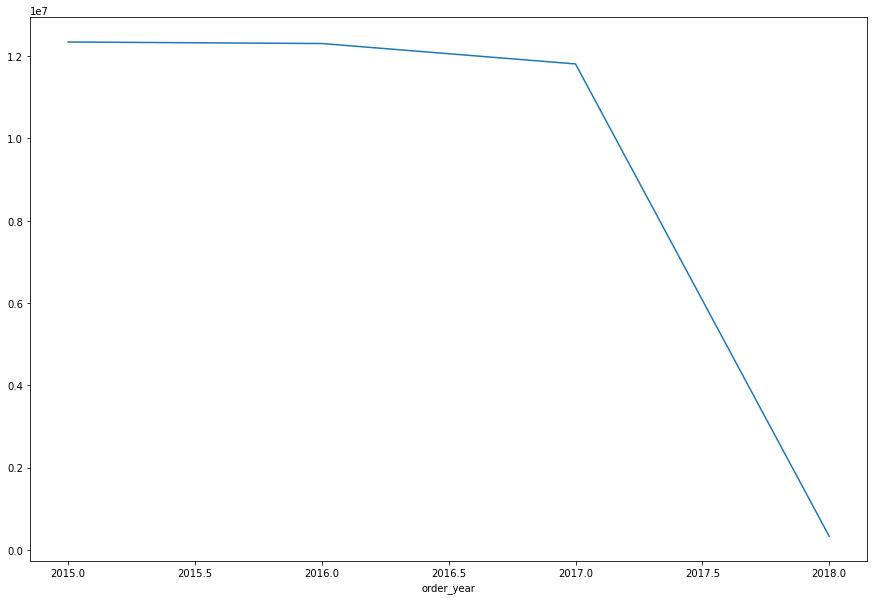

In [32]:
df.groupby('order_year')['Sales'].sum().plot(kind='line')

<AxesSubplot:xlabel='order_month'>

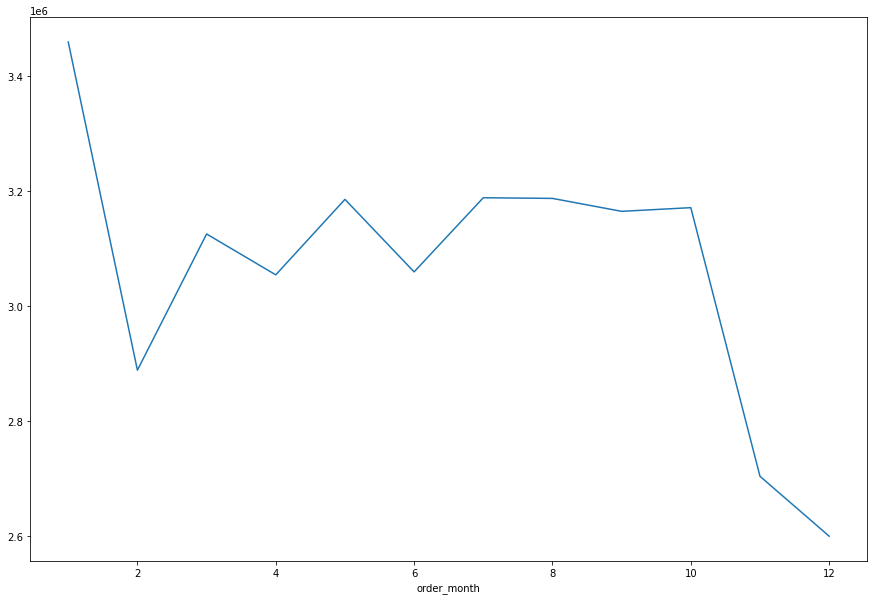

In [42]:
df.groupby('order_month')['Sales'].sum().plot(kind='line')

<AxesSubplot:xlabel='order_day'>

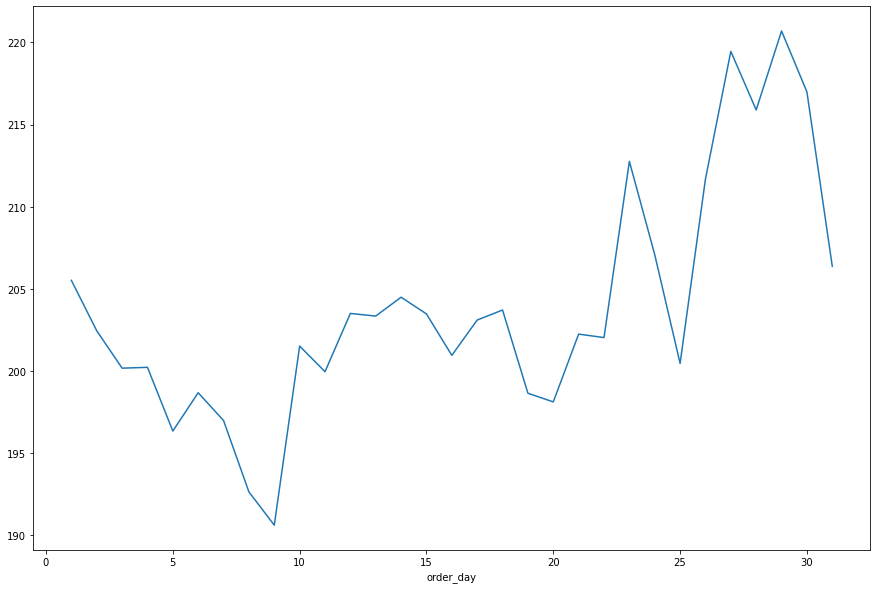

In [44]:
df.groupby('order_day')['Sales'].mean().plot(kind='line')

<AxesSubplot:xlabel='order_weekday'>

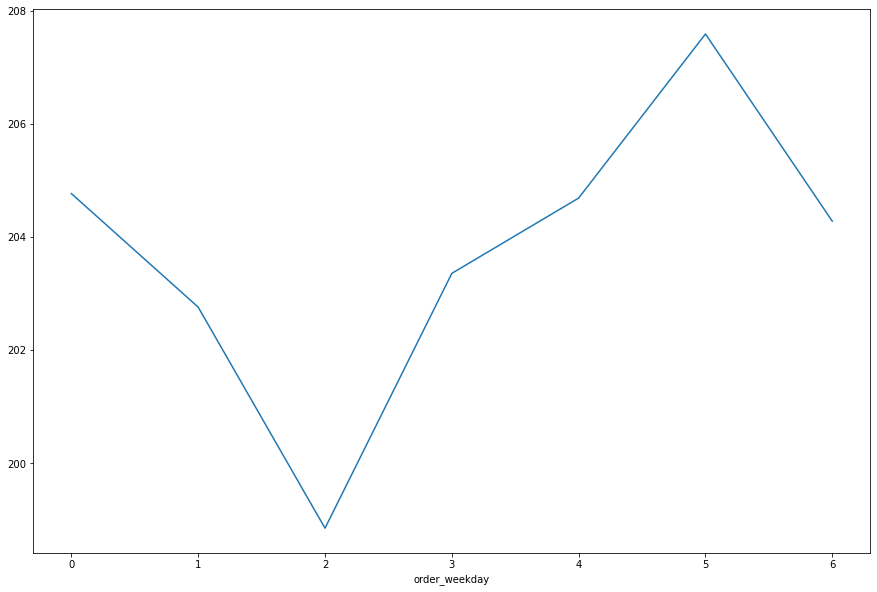

In [45]:
df.groupby('order_weekday')['Sales'].mean().plot(kind='line')

### Checking for Correlation

<AxesSubplot:>

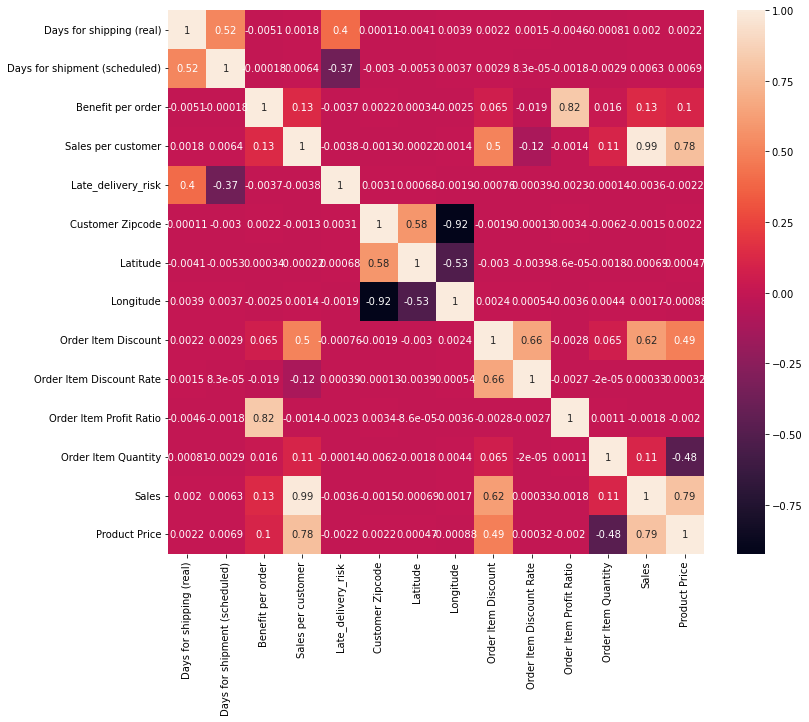

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

### Statistical Hypothesis Testing

In [289]:
st.chi2_contingency(pd.crosstab(df['Late_delivery_risk'], df['Shipping Mode']))

(37714.02289414125,
 0.0,
 3,
 array([[12563.2742804 ,  4398.25267566, 15907.24722462, 48671.22581932],
        [15249.7257196 ,  5338.74732434, 19308.75277538, 59078.77418068]]))

### Outlier Treatment

In [290]:
outlier_list = ['Product Price','Order Item Profit Ratio', 'Order Item Discount','Sales per customer', 'Benefit per order']

In [291]:
for i in outlier_list:
    print(i,":",df[i].skew())

Product Price : 3.191093007406851
Order Item Profit Ratio : -2.8935008398426443
Order Item Discount : 3.0399403308380126
Sales per customer : 2.8884810873783624
Benefit per order : -4.741796787312843


In [292]:
pt = PowerTransformer(method ='yeo-johnson')

In [293]:
df['product_price_trans'] = pt.fit_transform(df['Product Price'].values.reshape(-1,1))
df['order_item_profit_ratio_trans'] = pt.fit_transform(df['Order Item Profit Ratio'].values.reshape(-1,1))
df['order_item_discount_trans'] = pt.fit_transform(df['Order Item Discount'].values.reshape(-1,1))
df['benefit_per_order_trans'] = pt.fit_transform(df['Benefit per order'].values.reshape(-1,1))
df['Sales_per_customer_trans'] = pt.fit_transform(df['Sales per customer'].values.reshape(-1,1))
 

In [294]:
st.skew(benefit_per_order_trans)

array([1.50883966])

In [295]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order Country', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Region', 'Order Status', 'Product Name', 'Product Price', 'Shipping Mode', 'order_date', 'shipping_date', 'order_year', 'order_month', 'order_day', 'order_weekday', 'product_price_trans', 'order_item_profit_ratio_trans', 'order_item_discount_trans', 'benefit_per_order_trans', 'Sales_per_customer_trans'], dtype='object')

In [296]:
df.drop(['shipping_date','order_date'], axis = 1, inplace = True)

In [297]:
df.drop(['Product Price', 'Order Item Profit Ratio', 'Order Item Discount', 'Benefit per order', 'Sales per customer'], axis = 1, inplace = True)

### Encoding

In [298]:
df_cat.describe().T

,count,unique,top,freq
Type,180519,4,DEBIT,69295
Delivery Status,180519,4,Late delivery,98977
Category Name,180519,50,Cleats,24551
Customer City,180519,563,Caguas,66770
Customer Country,180519,2,EE. UU.,111146
Customer Segment,180519,3,Consumer,93504
Customer State,180519,46,PR,69373
Customer Street,180519,7458,9126 Wishing Expressway,122
Department Name,180519,11,Fan Shop,66861
Market,180519,5,LATAM,51594


In [299]:
LE = LabelEncoder()

In [300]:
df.Type = LE.fit_transform(df.Type)
df['Delivery Status']= LE.fit_transform(df['Delivery Status'])
df['Department Name']= LE.fit_transform(df['Department Name'])
df['Market']= LE.fit_transform(df['Market'])
df['Order Status']= LE.fit_transform(df['Order Status'])
df['Shipping Mode']= LE.fit_transform(df['Shipping Mode'])

In [301]:
def freq_enc(col):
    dic = df[col].value_counts().to_dict()
    dic = {i: round(j/(len(df)),5) for i ,j in dic.items()}
    df[col] = df[col].map(dic) 

In [302]:
fe =['Category Name','Customer State','Order Country','Order Region','Product Name','Customer City']

In [303]:
for i in fe:
    freq_enc(i)

In [304]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order Country,Order Item Discount Rate,Order Item Quantity,Sales,Order Region,Order Status,Product Name,Shipping Mode,order_year,order_month,order_day,order_weekday,product_price_trans,order_item_profit_ratio_trans,order_item_discount_trans,benefit_per_order_trans,Sales_per_customer_trans
0,1,3,4,0,0,0.00198,0.36988,Puerto Rico,Consumer,0.38430,725.0,4,18.251453,-66.037056,3,0.02329,0.04,1,327.75,0.05284,2,0.00198,3,2018,1,31,2,1.375289,0.231274,-0.034040,0.892819,1.158019
1,3,5,4,1,1,0.00198,0.36988,Puerto Rico,Consumer,0.38430,725.0,4,18.279451,-66.037064,3,0.02650,0.05,1,327.75,0.04283,5,0.00198,3,2018,1,13,5,1.375289,-1.822325,0.164453,-1.875502,1.138347
2,0,4,4,3,0,0.00198,0.00522,EE. UU.,Consumer,0.16189,95125.0,4,37.292233,-121.881279,3,0.02650,0.06,1,327.75,0.04283,1,0.00198,3,2018,1,13,5,1.375289,-1.822325,0.252595,-1.869518,1.128456
3,1,3,4,0,0,0.00198,0.01893,EE. UU.,Home Office,0.16189,90027.0,4,34.125946,-118.291016,3,0.04707,0.07,1,327.75,0.05622,2,0.00198,3,2018,1,13,5,1.375289,-0.640231,0.484287,-0.257412,1.098624
4,2,2,4,0,0,0.00198,0.36988,Puerto Rico,Corporate,0.38430,725.0,4,18.253769,-66.037048,3,0.04707,0.09,1,327.75,0.05622,6,0.00198,3,2018,1,13,5,1.375289,1.216638,0.740374,1.690483,1.058236


In [305]:
y = df['Sales']
X = df.drop(["Sales"], axis = 1)

In [306]:
X = pd.get_dummies(X)

In [307]:
X.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order Country,Order Item Discount Rate,Order Item Quantity,Order Region,Order Status,Product Name,Shipping Mode,order_year,order_month,order_day,order_weekday,product_price_trans,order_item_profit_ratio_trans,order_item_discount_trans,benefit_per_order_trans,Sales_per_customer_trans,Customer Country_EE. UU.,Customer Country_Puerto Rico,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office
0,1,3,4,0,0,0.00198,0.36988,0.38430,725.0,4,18.251453,-66.037056,3,0.02329,0.04,1,0.05284,2,0.00198,3,2018,1,31,2,1.375289,0.231274,-0.034040,0.892819,1.158019,0,1,1,0,0
1,3,5,4,1,1,0.00198,0.36988,0.38430,725.0,4,18.279451,-66.037064,3,0.02650,0.05,1,0.04283,5,0.00198,3,2018,1,13,5,1.375289,-1.822325,0.164453,-1.875502,1.138347,0,1,1,0,0
2,0,4,4,3,0,0.00198,0.00522,0.16189,95125.0,4,37.292233,-121.881279,3,0.02650,0.06,1,0.04283,1,0.00198,3,2018,1,13,5,1.375289,-1.822325,0.252595,-1.869518,1.128456,1,0,1,0,0
3,1,3,4,0,0,0.00198,0.01893,0.16189,90027.0,4,34.125946,-118.291016,3,0.04707,0.07,1,0.05622,2,0.00198,3,2018,1,13,5,1.375289,-0.640231,0.484287,-0.257412,1.098624,1,0,0,0,1
4,2,2,4,0,0,0.00198,0.36988,0.38430,725.0,4,18.253769,-66.037048,3,0.04707,0.09,1,0.05622,6,0.00198,3,2018,1,13,5,1.375289,1.216638,0.740374,1.690483,1.058236,0,1,0,1,0


### Scaling

In [308]:
rs = RobustScaler()

In [309]:
col_list =['Customer Zipcode', 'Latitude','Longitude','order_year','order_day']

In [310]:
for i in col_list:
    X[i] = rs.fit_transform(X[i].values.reshape(-1,1))

In [311]:
X.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order Country,Order Item Discount Rate,Order Item Quantity,Order Region,Order Status,Product Name,Shipping Mode,order_year,order_month,order_day,order_weekday,product_price_trans,order_item_profit_ratio_trans,order_item_discount_trans,benefit_per_order_trans,Sales_per_customer_trans,Customer Country_EE. UU.,Customer Country_Puerto Rico,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office
0,1,3,4,0,0,0.00198,0.36988,0.38430,-0.240766,4,-0.708731,0.336819,3,0.02329,0.04,1,0.05284,2,0.00198,3,1.0,1,1.0,2,1.375289,0.231274,-0.034040,0.892819,1.158019,0,1,1,0,0
1,3,5,4,1,1,0.00198,0.36988,0.38430,-0.240766,4,-0.707399,0.336818,3,0.02650,0.05,1,0.04283,5,0.00198,3,1.0,1,-0.2,5,1.375289,-1.822325,0.164453,-1.875502,1.138347,0,1,1,0,0
2,0,4,4,3,0,0.00198,0.00522,0.16189,0.977582,4,0.197360,-1.404193,3,0.02650,0.06,1,0.04283,1,0.00198,3,1.0,1,-0.2,5,1.375289,-1.822325,0.252595,-1.869518,1.128456,1,0,1,0,0
3,1,3,4,0,0,0.00198,0.01893,0.16189,0.911786,4,0.046687,-1.292262,3,0.04707,0.07,1,0.05622,2,0.00198,3,1.0,1,-0.2,5,1.375289,-0.640231,0.484287,-0.257412,1.098624,1,0,0,0,1
4,2,2,4,0,0,0.00198,0.36988,0.38430,-0.240766,4,-0.708621,0.336819,3,0.04707,0.09,1,0.05622,6,0.00198,3,1.0,1,-0.2,5,1.375289,1.216638,0.740374,1.690483,1.058236,0,1,0,1,0


In [312]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state=100)

In [313]:
 Xctrain = sm.add_constant(Xtrain)

In [314]:
OLS_model = sm.OLS(ytrain, Xctrain).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 5.759e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        03:53:08   Log-Likelihood:            -6.7232e+05
No. Observations:              135387   AIC:                         1.345e+06
Df Residuals:                  135354   BIC:                         1.345e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           171.0825      0.635    269.558      0.000     169.838     172.326
Type                             -0.1971      0.163     -1.209      0.227      -0.517       0.122
Days for shipping (real)          0.1406      0.129      1.087      0.277      -0.113       0.394
Days for shipment (scheduled)     0.0554      0.194      0.287      0.774      -0.324       0.435
Delivery Status                   0.0121      0.121      0.100      0.920      -0.225       0.249
Late_delivery_risk               -0.4159      0.404     -1.029      0.303      -1.208       0.376
Category Name                  -113.7353     20.378     -5.581      0.000    -153.675     -73.796
Customer City                     0.4123      2.202      0.187      0.851      -3.903       4.728
Customer State                   -1.9227      2.462     -0.781      0.435      -6.748       2.902
Customer Zipcode                  0.1017      0.580      0.175      0.861      -1.036       1.239
Department Name                   0.7544      0.052     14.593      0.000       0.653       0.856
Latitude                          0.5619      0.525      1.071      0.284      -0.466       1.590
Longitude                         0.0199      0.389      0.051      0.959      -0.742       0.782
Market                            0.1549      0.111      1.397      0.163      -0.062       0.372
Order Country                    -4.4087      2.691     -1.638      0.101      -9.683       0.865
Order Item Discount Rate        350.3263      3.633     96.420      0.000     343.205     357.448
Order Item Quantity             -71.1246      0.252   -281.816      0.000     -71.619     -70.630
Order Region                     16.0653      2.080      7.724      0.000      11.988      20.142
Order Status                      0.0127      0.071      0.179      0.858      -0.127       0.152
Product Name                    100.0312     19.531      5.122      0.000      61.751     138.311
Shipping Mode                    -0.1056      0.240     -0.441      0.659      -0.575       0.364
order_year                        5.1389      0.237     21.710      0.000       4.675       5.603
order_month                       0.5391      0.031     17.462      0.000       0.479       0.600
order_day                         2.1199      0.161     13.205      0.000       1.805       2.434
order_weekday                     0.2653      0.047      5.623      0.000       0.173       0.358
product_price_trans            -133.1418      0.502   -264.965      0.000    -134.127    -132.157
order_item_profit_ratio_trans   -11.5681      0.153    -75.612      0.000     -11.868     -11.268
order_item_discount_trans         4.8992      0.279     17.560      0.000       4.352       5.446
benefit_per_order_trans          16.1828     

###### Residual Plot to Check for Linearity

In [315]:
y_pred_train = OLS_model.predict(Xctrain)

In [316]:
residual = OLS_model.resid

<AxesSubplot:>

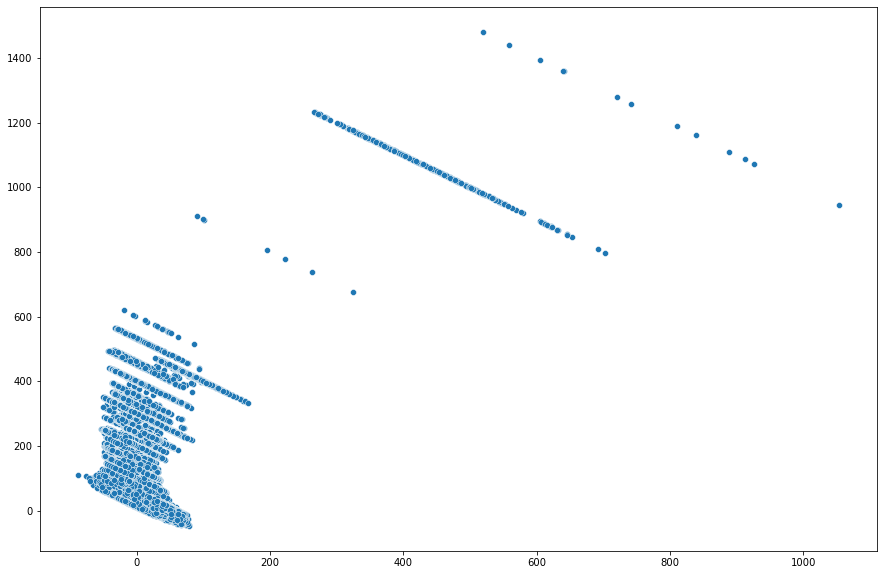

In [317]:
sns.scatterplot(residual, y_pred_train)

In [318]:
for i, j in OLS_model.pvalues.items():
    if j < 0.05:
        print(i,'-',j)

const - 0.0
Category Name - 2.390713214469607e-08
Department Name - 3.379824849444061e-48
Order Item Discount Rate - 0.0
Order Item Quantity - 0.0
Order Region - 1.139110943397826e-14
Product Name - 3.032086926616113e-07
order_year - 2.502663885616438e-104
order_month - 3.342615953160577e-68
order_day - 8.702921899963002e-40
order_weekday - 1.879870051018634e-08
product_price_trans - 0.0
order_item_profit_ratio_trans - 0.0
order_item_discount_trans - 5.955584132925325e-69
benefit_per_order_trans - 0.0
Sales_per_customer_trans - 0.0
Customer Country_EE. UU. - 0.0
Customer Country_Puerto Rico - 0.0
Customer Segment_Consumer - 0.0
Customer Segment_Corporate - 0.0
Customer Segment_Home Office - 0.0


In [319]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [320]:
vif.sort_values(by ='vif', ascending=False)

,vif,features
33,inf,Customer Segment_Home Office
30,inf,Customer Country_Puerto Rico
32,inf,Customer Segment_Corporate
31,inf,Customer Segment_Consumer
29,inf,Customer Country_EE. UU.
5,74.019726,Category Name
18,73.652666,Product Name
24,28.507736,product_price_trans
28,24.064772,Sales_per_customer_trans
7,18.210003,Customer State


In [321]:
Xctest = sm.add_constant(Xtest)

In [322]:
y_pred = OLS_model.predict(Xctest)


In [323]:
mae = mean_absolute_error(ytest, y_pred)
mae

22.52277856928467

In [324]:
mape = mean_absolute_percentage_error(ytest, y_pred)
mape

0.20441258793583267

In [325]:
msp = mean_squared_error(ytest, y_pred)
msp

1110.8953906850118

In [326]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
rmse

33.33009736986995

In [327]:
linreg = LinearRegression()

In [328]:
model_sk = linreg.fit(Xtrain, ytrain)
model_sk

LinearRegression()

In [329]:
model_sk.score(Xtest, ytest)

0.9352937722931839

In [330]:
lin_reg_pipeline = Pipeline([('scaler', RobustScaler()), ('linear regression',LinearRegression())])
Ridge_reg_pipeline = Pipeline([('scaler', RobustScaler()), ('Ridge regression',Ridge())])
lasso_reg_pipeline = Pipeline([('scaler', RobustScaler()), ('Lasso regression',Lasso())])
Elasticnet_pipeline = Pipeline([('scaler', RobustScaler()), ('Elastic Net regression',ElasticNet())])

In [331]:
pipelines = [lin_reg_pipeline, Ridge_reg_pipeline,lasso_reg_pipeline, Elasticnet_pipeline]
pipe_dict ={0: 'linear regression', 1: 'Ridge regression', 2: 'Lasso regression', 3: 'Elastic Net regression'}

In [332]:
final_features = Xtest
target = ytest

In [333]:
scores_df = pd.DataFrame(columns= ['Model', 'Scores'] )
for i , pipe in enumerate(pipelines):
    score = cross_val_score(pipe, final_features, target, cv =5)
    print(pipe_dict[i], ":", score.max())

linear regression : 0.9375596036664812
Ridge regression : 0.9375687596515688
Lasso regression : 0.9169369807262753
Elastic Net regression : 0.7855149880865897


In [334]:
dt = DecisionTreeRegressor(random_state=100)

In [336]:
dt_model = dt.fit(Xtrain, ytrain)
dt_model.score(Xtrain, ytrain)

1.0

In [337]:
dt_model.score(Xtest, ytest)

0.9999892605807056

In [341]:
def model_performance(model):
    y_pred = model.predict(Xtest)
    mae = mean_absolute_error(ytest, y_pred)
    mape = mean_absolute_percentage_error(ytest, y_pred)
    mse = mean_squared_error(ytest, y_pred)
    rmse = mean_squared_error(ytest, y_pred, squared=False)
    print('MAE:',mae)
    print('MAPE:', mape)
    print('MSE:',mse)
    print('RMSE:', rmse)

In [342]:
model_performance(dt_model)

MAE: 0.008305524386444033
MAPE: 3.6123244590552476e-05
MSE: 0.18437748290349604
RMSE: 0.4293919921278179


In [343]:
re = RandomForestRegressor(random_state=100)

In [344]:
random_model = re.fit(Xtrain, ytrain)
random_model.score(Xtrain, ytrain)

0.9999886381014009

In [345]:
random_model.score(Xtest, ytest)

0.9999924188195825

In [346]:
model_performance(random_model)

MAE: 0.014491504274221271
MAPE: 8.085559056455784e-05
MSE: 0.13015591667564955
RMSE: 0.36077128028107996


After Analysing the performance of various models I have decided to go with DecisionTree Regressor model to calculate Sales 

### Problem2:Building Model to identify the factors Contributing to Late Delivery Risk

In [222]:
df = pd.get_dummies(df, drop_first= True)

In [228]:
y1 = df['Late_delivery_risk']
X1= df.drop(['Late_delivery_risk'], axis =1)

In [229]:
col_list1 =['Customer Zipcode', 'Latitude','Longitude','order_year','order_day','Sales']

In [230]:
for i in col_list:
    X1[i] = rs.fit_transform(X1[i].values.reshape(-1,1))

In [232]:
X1train, X1test, y1train, y1test = train_test_split(X1,y1, test_size=0.2, random_state=120)

In [233]:
lr = LogisticRegression()

In [235]:
lr_model = lr.fit(X1train, y1train)

In [236]:
ypred1 = lr_model.predict(X1test)

In [238]:
print(classification_report(y1test, ypred1))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     16318
           1       0.98      0.99      0.99     19786

    accuracy                           0.98     36104
   macro avg       0.98      0.98      0.98     36104
weighted avg       0.98      0.98      0.98     36104



In [239]:
print(confusion_matrix(y1test, ypred1))

[[15893   425]
 [  152 19634]]


In [242]:
log_reg_pipeline = Pipeline([('scaler', RobustScaler()), ('logistic regression',LogisticRegression())])
dt_pipeline = Pipeline([('scaler', RobustScaler()), ('Decision Tree Classfier',DecisionTreeClassifier())])
KNN_pipeline = Pipeline([('scaler', RobustScaler()), ('KNN Classifer',KNeighborsClassifier())])

In [243]:
pipelines = [log_reg_pipeline, dt_pipeline,KNN_pipeline]
pipe_dict ={0: 'logistic regression', 1: 'Decision Tree Classfier', 2: 'KNN Classifer'}

In [244]:
final_features1 = X1test
target1 = y1test

In [245]:
scores_df = pd.DataFrame(columns= ['Model', 'Scores'] )
for i , pipe in enumerate(pipelines):
    score = cross_val_score(pipe, final_features1, target1, cv =5)
    print(pipe_dict[i], ":", score.max())

logistic regression : 0.9939066611272677
Decision Tree Classfier : 1.0
KNN Classifer : 0.977562326869806


All Three models are giving very high accuracy, hence decided to go with the logistic regression model 
as our classification model.